In [ ]:
!pip install kaggle
!pip install torch torchvision timm segmentation-models-pytorch
!pip install rasterio opencv-python matplotlib


In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json here


{}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list -s xview2


ref                                             title                                             size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------  -----------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
tunguz/xview2-challenge-dataset-tier-3-data     xView2 Challenge Dataset - Tier 3 Data     18593707905  2019-11-21 00:46:47.197000            823         17  0.625            
tunguz/xview2-challenge-dataset-train-and-test  xView2 Challenge Dataset - train and test  11105326709  2019-11-20 22:39:38.477000           1322         16  0.625            
olgaiv39/xview2                                 xview2                                     11102314351  2019-12-13 21:42:11.200000             27          2  0.125            
louisekita/xview2                               xview2                                      8389173184  2022-03-18 06:11

In [ ]:
!kaggle datasets download -d louisekita/xview2-test1 -p .


Dataset URL: https://www.kaggle.com/datasets/louisekita/xview2-test1
License(s): unknown
 98% 692M/707M [00:02<00:00, 216MB/s]
100% 707M/707M [00:02<00:00, 293MB/s]


In [ ]:
!unzip -q xview2-test1.zip -d xview2_data


In [ ]:
import os

for root, dirs, files in os.walk("xview2_data", topdown=True):
    level = root.replace("xview2_data", "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files[:5]:  # show only first 5 files per folder
        print(f"{subindent}{f}")


xview2_data/
    santa-rosa-wildfire/
        masks/
            santa-rosa-wildfire_00000142_pre_disaster.png
            santa-rosa-wildfire_00000287_pre_disaster.png
            santa-rosa-wildfire_00000111_pre_disaster.png
            santa-rosa-wildfire_00000072_pre_disaster.png
            santa-rosa-wildfire_00000371_pre_disaster.png
        labels/
            santa-rosa-wildfire_00000374_post_disaster.json
            santa-rosa-wildfire_00000374_pre_disaster.json
            santa-rosa-wildfire_00000301_post_disaster.json
            santa-rosa-wildfire_00000136_pre_disaster.json
            santa-rosa-wildfire_00000136_post_disaster.json
        images/
            santa-rosa-wildfire_00000142_pre_disaster.png
            santa-rosa-wildfire_00000287_pre_disaster.png
            santa-rosa-wildfire_00000165_post_disaster.png
            santa-rosa-wildfire_00000111_pre_disaster.png
            santa-rosa-wildfire_00000072_pre_disaster.png


In [ ]:
print("Feature keys:", features.keys())

# Inspect one key's contents
for key in features.keys():
    print(f"\nKey: {key} → type: {type(features[key])}")
    if isinstance(features[key], list):
        print(f"Length of {key}:", len(features[key]))
        if len(features[key]) > 0:
            print("First element keys:", features[key][0].keys())


Feature keys: dict_keys(['lng_lat', 'xy'])

Key: lng_lat → type: <class 'list'>
Length of lng_lat: 3
First element keys: dict_keys(['properties', 'wkt'])

Key: xy → type: <class 'list'>
Length of xy: 3
First element keys: dict_keys(['properties', 'wkt'])


In [ ]:
import os
import glob

BASE_DIR = "xview2_data/santa-rosa-wildfire"
IMG_DIR = os.path.join(BASE_DIR, "images")
LBL_DIR = os.path.join(BASE_DIR, "labels")

img_files = sorted(glob.glob(os.path.join(IMG_DIR, "*.png")))
lbl_files = sorted(glob.glob(os.path.join(LBL_DIR, "*.json")))

print("🖼️ Total images:", len(img_files))
print("📄 Total labels:", len(lbl_files))

for lbl in lbl_files[:5]:
    base = os.path.basename(lbl).replace("_post_disaster.json", "").replace("_pre_disaster.json", "")
    pre_img = os.path.join(IMG_DIR, f"{base}_pre_disaster.png")
    post_img = os.path.join(IMG_DIR, f"{base}_post_disaster.png")
    print(f"\nLabel: {lbl}")
    print("Pre image exists? ", os.path.exists(pre_img))
    print("Post image exists?", os.path.exists(post_img))


🖼️ Total images: 452
📄 Total labels: 452

Label: xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000002_post_disaster.json
Pre image exists?  True
Post image exists? True

Label: xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000002_pre_disaster.json
Pre image exists?  True
Post image exists? True

Label: xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000003_post_disaster.json
Pre image exists?  True
Post image exists? True

Label: xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000003_pre_disaster.json
Pre image exists?  True
Post image exists? True

Label: xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000004_post_disaster.json
Pre image exists?  True
Post image exists? True


In [ ]:
import json

sample_json = "xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000002_post_disaster.json"

with open(sample_json, "r") as f:
    data = json.load(f)

features = data.get("features", {})
print("Keys in features:", features.keys())

for key in features.keys():
    print(f"{key} → {len(features[key])} items")
    if len(features[key]) > 0:
        print("First element keys:", features[key][0].keys())
        print("First element sample:", features[key][0])


Keys in features: dict_keys(['lng_lat', 'xy'])
lng_lat → 114 items
First element keys: dict_keys(['properties', 'wkt'])
First element sample: {'properties': {'feature_type': 'building', 'subtype': 'no-damage', 'uid': '67ec3baa-c68e-4187-b98e-a0d453cabd8f'}, 'wkt': 'POLYGON ((-122.7695959650581 38.49260089067831, -122.7694263829402 38.49259829062002, -122.76942905138 38.4925179984921, -122.7695977965323 38.4925197568224, -122.7695977133435 38.49255283588552, -122.7695959650581 38.49260089067831))'}
xy → 114 items
First element keys: dict_keys(['properties', 'wkt'])
First element sample: {'properties': {'feature_type': 'building', 'subtype': 'no-damage', 'uid': '67ec3baa-c68e-4187-b98e-a0d453cabd8f'}, 'wkt': 'POLYGON ((603.0370635205642 907.2332839854768, 636.0523966102161 907.7946718973542, 635.5827293760377 927.6847945381896, 602.7308195682341 927.3314986613848, 602.7265060094127 919.1375841681667, 603.0370635205642 907.2332839854768))'}


In [ ]:
import os
from glob import glob

LABELS_DIR = "/content/xview2_data/santa-rosa-wildfire/labels"
annotation_files = glob(os.path.join(LABELS_DIR, "*.json"))

print("📊 Total JSON annotation files:", len(annotation_files))


📊 Total JSON annotation files: 452


In [ ]:
import os
import json
import cv2
import numpy as np
from shapely import wkt
from shapely.geometry import Polygon
from shapely.affinity import affine_transform
from glob import glob
from tqdm import tqdm

# === Paths ===
BASE_DIR = "/content/xview2_data/santa-rosa-wildfire"
IMAGES_DIR = os.path.join(BASE_DIR, "images")
LABELS_DIR = os.path.join(BASE_DIR, "labels")
OUT_DIR = "/content/patches"
os.makedirs(OUT_DIR, exist_ok=True)

# === Damage class mapping ===
damage_dict = {
    "no-damage": 0,
    "minor-damage": 1,
    "major-damage": 2,
    "destroyed": 3
}

# === Function: extract building patches ===
def extract_building_patches(pre_img_path, post_img_path, annotation_path, out_dir, patch_size=128):
    with open(annotation_path, "r") as f:
        data = json.load(f)

    # Features live inside "xy"
    features = data.get("features", {}).get("xy", [])
    if not features:
        print(f"⚠️ No features in {annotation_path}")
        return

    pre_img = cv2.imread(pre_img_path)
    post_img = cv2.imread(post_img_path)

    if pre_img is None or post_img is None:
        print(f"⚠️ Could not load images for {annotation_path}")
        return

    h, w, _ = pre_img.shape

    count = 0
    for feat in features:
        props = feat.get("properties", {})
        damage_type = props.get("subtype", "no-damage")

        if damage_type not in damage_dict:
            continue

        poly_wkt = feat.get("wkt")
        try:
            poly = wkt.loads(poly_wkt)
        except:
            continue

        # Convert polygon coordinates to bounding box
        minx, miny, maxx, maxy = poly.bounds

        # Ensure integer coordinates within image
        x1, y1, x2, y2 = map(int, [max(minx, 0), max(miny, 0), min(maxx, w), min(maxy, h)])

        if x2 - x1 < 10 or y2 - y1 < 10:
            continue  # too small

        pre_crop = pre_img[y1:y2, x1:x2]
        post_crop = post_img[y1:y2, x1:x2]

        # Resize both to patch_size
        pre_crop = cv2.resize(pre_crop, (patch_size, patch_size))
        post_crop = cv2.resize(post_crop, (patch_size, patch_size))

        # Save patches into class folder
        dmg_label = damage_type.replace(" ", "_")
        class_dir = os.path.join(out_dir, dmg_label)
        os.makedirs(class_dir, exist_ok=True)

        cv2.imwrite(os.path.join(class_dir, f"{os.path.basename(annotation_path)}_{count}_pre.png"), pre_crop)
        cv2.imwrite(os.path.join(class_dir, f"{os.path.basename(annotation_path)}_{count}_post.png"), post_crop)

        count += 1

    print(f"✅ Saved {count} patches from {annotation_path}")

# === Step 1: Build index of available images ===
image_files = set(os.listdir(IMAGES_DIR))

# === Step 2: Loop over JSONs ===
annotation_files = glob(os.path.join(LABELS_DIR, "*.json"))

usable, missing = 0, 0

for ann_path in tqdm(annotation_files[:1000]):  # limit to 50 for quick test
    base_name = os.path.splitext(os.path.basename(ann_path))[0]

    # Build pre/post names
    core_id = base_name.replace("_pre_disaster", "").replace("_post_disaster", "")
    pre_img_name = core_id + "_pre_disaster.png"
    post_img_name = core_id + "_post_disaster.png"

    pre_img_path = os.path.join(IMAGES_DIR, pre_img_name)
    post_img_path = os.path.join(IMAGES_DIR, post_img_name)

    if pre_img_name in image_files and post_img_name in image_files:
        extract_building_patches(pre_img_path, post_img_path, ann_path, OUT_DIR)
        usable += 1
    else:
        print(f"⚠️ Skipping {base_name}, no image pair found")
        missing += 1

print(f"\n📊 Summary: {usable} usable JSONs, {missing} missing pairs")


  0%|          | 1/452 [00:00<01:17,  5.81it/s]

✅ Saved 21 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000185_post_disaster.json
✅ Saved 3 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000297_post_disaster.json


  1%|          | 4/452 [00:00<01:27,  5.10it/s]

✅ Saved 158 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000095_pre_disaster.json
✅ Saved 11 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000249_post_disaster.json


  1%|          | 5/452 [00:00<01:13,  6.04it/s]

✅ Saved 11 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000146_pre_disaster.json


  1%|▏         | 6/452 [00:01<01:43,  4.33it/s]

✅ Saved 113 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000076_pre_disaster.json


  2%|▏         | 8/452 [00:02<02:14,  3.31it/s]

✅ Saved 280 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000155_pre_disaster.json
✅ Saved 11 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000314_post_disaster.json


  2%|▏         | 10/452 [00:02<02:09,  3.42it/s]

✅ Saved 139 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000097_post_disaster.json
✅ Saved 46 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000302_pre_disaster.json


  3%|▎         | 12/452 [00:03<01:36,  4.55it/s]

✅ Saved 19 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000276_post_disaster.json
✅ Saved 37 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000357_post_disaster.json


  3%|▎         | 13/452 [00:03<02:30,  2.92it/s]

✅ Saved 225 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000163_pre_disaster.json


  3%|▎         | 14/452 [00:03<02:13,  3.29it/s]

✅ Saved 53 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000214_post_disaster.json


  4%|▎         | 16/452 [00:04<01:55,  3.78it/s]

✅ Saved 122 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000007_post_disaster.json
✅ Saved 14 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000330_post_disaster.json


  4%|▍         | 17/452 [00:04<01:35,  4.56it/s]

✅ Saved 7 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000018_pre_disaster.json


  4%|▍         | 19/452 [00:05<01:39,  4.37it/s]

✅ Saved 110 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000189_pre_disaster.json
✅ Saved 27 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000209_pre_disaster.json


  4%|▍         | 20/452 [00:05<01:22,  5.24it/s]

✅ Saved 11 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000128_pre_disaster.json


  5%|▍         | 22/452 [00:05<01:32,  4.65it/s]

✅ Saved 129 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000090_pre_disaster.json
✅ Saved 13 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000254_pre_disaster.json


  5%|▌         | 23/452 [00:05<01:30,  4.76it/s]

✅ Saved 47 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000344_pre_disaster.json
✅ Saved 5 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000252_pre_disaster.json


  6%|▌         | 25/452 [00:06<01:35,  4.49it/s]

✅ Saved 134 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000142_pre_disaster.json
✅ Saved 3 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000151_post_disaster.json


  6%|▌         | 27/452 [00:06<01:35,  4.43it/s]

✅ Saved 122 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000015_post_disaster.json


  6%|▌         | 28/452 [00:06<01:34,  4.49it/s]

✅ Saved 53 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000162_pre_disaster.json


  7%|▋         | 30/452 [00:07<01:54,  3.69it/s]

✅ Saved 240 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000175_post_disaster.json
✅ Saved 11 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000146_post_disaster.json


  7%|▋         | 31/452 [00:07<01:42,  4.11it/s]

✅ Saved 34 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000251_pre_disaster.json
✅ Saved 10 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000158_pre_disaster.json


  8%|▊         | 34/452 [00:08<01:15,  5.53it/s]

✅ Saved 55 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000210_pre_disaster.json
✅ Saved 20 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000005_post_disaster.json


  8%|▊         | 36/452 [00:08<01:02,  6.64it/s]

✅ Saved 10 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000051_pre_disaster.json
✅ Saved 4 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000200_post_disaster.json


  8%|▊         | 37/452 [00:08<01:11,  5.81it/s]

✅ Saved 35 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000117_pre_disaster.json
✅ Saved 3 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000091_post_disaster.json


  9%|▊         | 39/452 [00:09<01:17,  5.36it/s]

✅ Saved 69 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000313_post_disaster.json


  9%|▉         | 42/452 [00:10<01:30,  4.53it/s]

✅ Saved 174 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000374_post_disaster.json
✅ Saved 2 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000345_post_disaster.json
✅ Saved 7 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000298_pre_disaster.json


 10%|▉         | 44/452 [00:10<01:57,  3.46it/s]

✅ Saved 180 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000050_post_disaster.json
✅ Saved 8 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000275_pre_disaster.json


 10%|█         | 46/452 [00:11<01:28,  4.61it/s]

✅ Saved 26 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000119_pre_disaster.json
✅ Saved 14 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000229_pre_disaster.json


 11%|█         | 49/452 [00:12<01:38,  4.11it/s]

✅ Saved 267 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000216_post_disaster.json
✅ Saved 5 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000241_pre_disaster.json
✅ Saved 9 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000301_pre_disaster.json


 11%|█▏        | 51/452 [00:12<01:23,  4.79it/s]

✅ Saved 22 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000237_pre_disaster.json
✅ Saved 41 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000096_pre_disaster.json
✅ Saved 10 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000109_post_disaster.json


 12%|█▏        | 53/452 [00:13<01:45,  3.77it/s]

✅ Saved 250 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000199_post_disaster.json


 12%|█▏        | 55/452 [00:13<01:38,  4.02it/s]

✅ Saved 97 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000022_post_disaster.json
✅ Saved 34 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000047_pre_disaster.json


 12%|█▏        | 56/452 [00:13<01:25,  4.62it/s]

✅ Saved 15 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000324_post_disaster.json
✅ Saved 2 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000345_pre_disaster.json


 13%|█▎        | 58/452 [00:13<01:07,  5.83it/s]

✅ Saved 42 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000033_pre_disaster.json


 13%|█▎        | 59/452 [00:14<01:46,  3.71it/s]

✅ Saved 214 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000372_post_disaster.json


 13%|█▎        | 61/452 [00:15<02:11,  2.98it/s]

✅ Saved 274 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000058_post_disaster.json
✅ Saved 40 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000376_post_disaster.json


 14%|█▎        | 62/452 [00:16<02:57,  2.20it/s]

✅ Saved 291 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000149_post_disaster.json


 14%|█▍        | 64/452 [00:17<02:36,  2.48it/s]

✅ Saved 254 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000138_post_disaster.json
✅ Saved 19 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000023_post_disaster.json


 15%|█▍        | 67/452 [00:17<01:53,  3.40it/s]

✅ Saved 226 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000179_post_disaster.json
✅ Saved 3 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000299_post_disaster.json
✅ Saved 13 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000268_pre_disaster.json


 15%|█▌        | 68/452 [00:17<01:38,  3.88it/s]

✅ Saved 26 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000135_pre_disaster.json


 16%|█▌        | 71/452 [00:18<01:09,  5.49it/s]

✅ Saved 87 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000101_post_disaster.json
⚠️ No features in /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000320_post_disaster.json
✅ Saved 26 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000135_post_disaster.json


 16%|█▋        | 74/452 [00:18<00:51,  7.28it/s]

✅ Saved 15 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000223_pre_disaster.json
✅ Saved 5 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000024_post_disaster.json
✅ Saved 8 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000280_post_disaster.json


 17%|█▋        | 76/452 [00:19<01:28,  4.24it/s]

✅ Saved 267 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000216_pre_disaster.json
✅ Saved 18 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000168_post_disaster.json


 17%|█▋        | 79/452 [00:20<01:04,  5.76it/s]

✅ Saved 76 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000049_pre_disaster.json
✅ Saved 4 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000091_pre_disaster.json
✅ Saved 3 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000183_post_disaster.json
✅ Saved 1 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000331_post_disaster.json


 18%|█▊        | 81/452 [00:20<00:52,  7.11it/s]

✅ Saved 22 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000264_post_disaster.json


 18%|█▊        | 83/452 [00:20<00:54,  6.81it/s]

✅ Saved 21 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000168_pre_disaster.json
✅ Saved 9 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000221_pre_disaster.json
✅ Saved 2 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000341_pre_disaster.json


 19%|█▉        | 87/452 [00:20<00:42,  8.61it/s]

✅ Saved 34 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000117_post_disaster.json
✅ Saved 9 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000078_pre_disaster.json
✅ Saved 10 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000034_pre_disaster.json


 19%|█▉        | 88/452 [00:21<00:56,  6.44it/s]

✅ Saved 43 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000205_pre_disaster.json


 20%|█▉        | 90/452 [00:21<00:54,  6.59it/s]

✅ Saved 32 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000073_post_disaster.json
✅ Saved 1 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000300_post_disaster.json


 20%|██        | 91/452 [00:21<01:08,  5.29it/s]

✅ Saved 27 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000333_post_disaster.json


 20%|██        | 92/452 [00:22<02:05,  2.87it/s]

✅ Saved 189 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000281_post_disaster.json


 21%|██        | 94/452 [00:23<02:23,  2.50it/s]

✅ Saved 265 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000057_pre_disaster.json
✅ Saved 2 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000293_pre_disaster.json


 22%|██▏       | 98/452 [00:24<01:24,  4.17it/s]

✅ Saved 252 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000199_pre_disaster.json
⚠️ No features in /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000258_pre_disaster.json
✅ Saved 1 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000245_post_disaster.json
✅ Saved 11 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000128_post_disaster.json


 22%|██▏       | 100/452 [00:24<01:12,  4.84it/s]

✅ Saved 18 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000190_post_disaster.json
✅ Saved 34 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000006_pre_disaster.json


 23%|██▎       | 102/452 [00:24<00:55,  6.34it/s]

✅ Saved 3 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000234_post_disaster.json
✅ Saved 2 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000069_post_disaster.json


 23%|██▎       | 104/452 [00:25<00:51,  6.81it/s]

✅ Saved 26 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000119_post_disaster.json
✅ Saved 13 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000254_post_disaster.json


 23%|██▎       | 106/452 [00:25<00:50,  6.92it/s]

✅ Saved 27 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000031_post_disaster.json
✅ Saved 21 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000185_pre_disaster.json


 24%|██▍       | 108/452 [00:26<01:17,  4.41it/s]

✅ Saved 175 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000374_pre_disaster.json
✅ Saved 34 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000047_post_disaster.json


 24%|██▍       | 110/452 [00:26<01:12,  4.75it/s]

✅ Saved 44 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000046_post_disaster.json
✅ Saved 62 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000075_post_disaster.json


 25%|██▍       | 112/452 [00:26<00:52,  6.46it/s]

✅ Saved 4 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000338_pre_disaster.json
✅ Saved 3 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000252_post_disaster.json


 25%|██▌       | 113/452 [00:26<00:55,  6.10it/s]

✅ Saved 45 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000302_post_disaster.json


 25%|██▌       | 114/452 [00:27<01:14,  4.55it/s]

✅ Saved 127 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000165_pre_disaster.json


 26%|██▌       | 116/452 [00:27<01:15,  4.45it/s]

✅ Saved 114 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000106_post_disaster.json
✅ Saved 22 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000351_post_disaster.json
✅ Saved 8 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000105_post_disaster.json


 26%|██▌       | 118/452 [00:28<01:20,  4.15it/s]

✅ Saved 140 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000097_pre_disaster.json
✅ Saved 4 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000315_post_disaster.json


 27%|██▋       | 122/452 [00:29<01:02,  5.29it/s]

✅ Saved 180 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000050_pre_disaster.json
✅ Saved 2 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000341_post_disaster.json
✅ Saved 5 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000094_post_disaster.json


 27%|██▋       | 124/452 [00:29<00:57,  5.67it/s]

✅ Saved 15 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000306_pre_disaster.json
✅ Saved 46 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000153_post_disaster.json


 28%|██▊       | 126/452 [00:29<00:52,  6.26it/s]

✅ Saved 34 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000251_post_disaster.json
✅ Saved 17 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000287_post_disaster.json


 28%|██▊       | 128/452 [00:30<01:27,  3.69it/s]

✅ Saved 280 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000155_post_disaster.json
✅ Saved 13 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000270_post_disaster.json
✅ Saved 8 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000296_post_disaster.json


 29%|██▉       | 130/452 [00:31<01:39,  3.25it/s]

✅ Saved 214 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000084_pre_disaster.json


 29%|██▉       | 132/452 [00:31<01:23,  3.85it/s]

✅ Saved 92 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000124_pre_disaster.json
✅ Saved 11 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000182_pre_disaster.json
✅ Saved 3 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000340_pre_disaster.json


 30%|██▉       | 134/452 [00:32<01:30,  3.52it/s]

✅ Saved 189 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000355_pre_disaster.json
✅ Saved 7 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000298_post_disaster.json


 30%|███       | 136/452 [00:32<01:11,  4.43it/s]

✅ Saved 34 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000244_post_disaster.json


 31%|███       | 138/452 [00:33<01:16,  4.09it/s]

✅ Saved 161 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000173_post_disaster.json
✅ Saved 27 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000333_pre_disaster.json


 31%|███       | 140/452 [00:33<01:08,  4.55it/s]

✅ Saved 51 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000056_pre_disaster.json
✅ Saved 40 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000096_post_disaster.json


 31%|███       | 141/452 [00:33<01:01,  5.04it/s]

✅ Saved 24 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000093_pre_disaster.json


 32%|███▏      | 143/452 [00:34<00:58,  5.31it/s]

✅ Saved 43 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000250_pre_disaster.json
✅ Saved 4 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000356_post_disaster.json


 32%|███▏      | 145/452 [00:34<00:50,  6.05it/s]

✅ Saved 10 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000152_pre_disaster.json
✅ Saved 12 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000248_post_disaster.json


 32%|███▏      | 146/452 [00:34<01:06,  4.63it/s]

✅ Saved 69 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000304_post_disaster.json


 33%|███▎      | 149/452 [00:35<00:54,  5.57it/s]

✅ Saved 100 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000309_post_disaster.json
⚠️ No features in /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000125_post_disaster.json
✅ Saved 2 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000187_post_disaster.json


 33%|███▎      | 150/452 [00:35<01:16,  3.95it/s]

✅ Saved 92 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000124_post_disaster.json


 33%|███▎      | 151/452 [00:35<01:16,  3.93it/s]

✅ Saved 43 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000250_post_disaster.json
⚠️ No features in /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000247_post_disaster.json


 34%|███▍      | 154/452 [00:36<00:55,  5.42it/s]

✅ Saved 46 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000153_pre_disaster.json
✅ Saved 6 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000208_post_disaster.json
✅ Saved 3 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000297_pre_disaster.json


 35%|███▍      | 158/452 [00:36<00:39,  7.45it/s]

✅ Saved 29 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000235_post_disaster.json
✅ Saved 8 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000055_pre_disaster.json
✅ Saved 3 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000116_post_disaster.json


 35%|███▌      | 159/452 [00:36<00:39,  7.42it/s]

✅ Saved 22 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000351_pre_disaster.json


 36%|███▌      | 161/452 [00:37<00:50,  5.77it/s]

✅ Saved 123 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000007_pre_disaster.json
✅ Saved 18 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000059_pre_disaster.json


 36%|███▌      | 162/452 [00:37<00:46,  6.18it/s]

✅ Saved 22 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000136_post_disaster.json


 36%|███▋      | 164/452 [00:38<00:56,  5.06it/s]

✅ Saved 113 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000076_post_disaster.json
✅ Saved 26 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000369_pre_disaster.json
✅ Saved 1 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000331_pre_disaster.json


 37%|███▋      | 166/452 [00:38<00:40,  7.02it/s]

✅ Saved 9 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000221_post_disaster.json
✅ Saved 5 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000094_pre_disaster.json


 37%|███▋      | 168/452 [00:38<00:36,  7.83it/s]

✅ Saved 30 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000114_post_disaster.json


 37%|███▋      | 169/452 [00:38<00:52,  5.43it/s]

✅ Saved 122 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000015_pre_disaster.json
✅ Saved 3 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000116_pre_disaster.json


 38%|███▊      | 172/452 [00:39<00:45,  6.11it/s]

✅ Saved 42 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000205_post_disaster.json
✅ Saved 30 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000030_post_disaster.json


 38%|███▊      | 173/452 [00:39<00:43,  6.37it/s]

✅ Saved 19 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000003_pre_disaster.json
✅ Saved 5 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000271_pre_disaster.json


 39%|███▊      | 175/452 [00:40<01:02,  4.41it/s]

✅ Saved 165 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000177_pre_disaster.json


 39%|███▉      | 177/452 [00:40<00:56,  4.85it/s]

✅ Saved 47 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000344_post_disaster.json
✅ Saved 14 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000229_post_disaster.json


 39%|███▉      | 178/452 [00:40<01:01,  4.44it/s]

✅ Saved 76 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000049_post_disaster.json


 40%|███▉      | 180/452 [00:41<01:04,  4.19it/s]

✅ Saved 139 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000041_pre_disaster.json
✅ Saved 19 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000042_pre_disaster.json


 40%|████      | 182/452 [00:41<00:50,  5.36it/s]

✅ Saved 13 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000291_post_disaster.json
✅ Saved 19 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000042_post_disaster.json


 40%|████      | 183/452 [00:41<00:51,  5.19it/s]

✅ Saved 49 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000098_pre_disaster.json
✅ Saved 4 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000356_pre_disaster.json
⚠️ No features in /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000192_post_disaster.json


 41%|████▏     | 187/452 [00:42<00:37,  7.14it/s]

✅ Saved 15 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000228_pre_disaster.json
✅ Saved 41 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000220_post_disaster.json


 42%|████▏     | 188/452 [00:42<00:47,  5.50it/s]

✅ Saved 5 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000148_post_disaster.json


 42%|████▏     | 189/452 [00:42<01:07,  3.89it/s]

✅ Saved 23 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000136_pre_disaster.json


 42%|████▏     | 191/452 [00:43<00:58,  4.46it/s]

✅ Saved 75 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000286_post_disaster.json
✅ Saved 24 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000134_post_disaster.json


 42%|████▏     | 192/452 [00:43<01:09,  3.72it/s]

✅ Saved 23 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000373_post_disaster.json


 43%|████▎     | 193/452 [00:44<01:58,  2.19it/s]

✅ Saved 231 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000243_post_disaster.json
✅ Saved 5 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000241_post_disaster.json


 44%|████▎     | 197/452 [00:45<01:01,  4.17it/s]

✅ Saved 76 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000286_pre_disaster.json
✅ Saved 2 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000274_post_disaster.json
✅ Saved 11 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000314_pre_disaster.json


 44%|████▍     | 199/452 [00:45<00:47,  5.37it/s]

✅ Saved 4 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000004_post_disaster.json
✅ Saved 1 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000017_post_disaster.json


 44%|████▍     | 201/452 [00:46<00:59,  4.18it/s]

✅ Saved 173 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000371_pre_disaster.json
✅ Saved 49 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000011_pre_disaster.json


 45%|████▌     | 204/452 [00:46<00:39,  6.23it/s]

✅ Saved 5 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000283_post_disaster.json
✅ Saved 9 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000067_post_disaster.json
✅ Saved 1 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000245_pre_disaster.json


 45%|████▌     | 205/452 [00:46<00:54,  4.54it/s]

✅ Saved 101 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000002_pre_disaster.json


 46%|████▌     | 208/452 [00:47<01:06,  3.68it/s]

✅ Saved 278 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000058_pre_disaster.json
⚠️ No features in /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000327_pre_disaster.json
✅ Saved 9 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000152_post_disaster.json


 46%|████▋     | 210/452 [00:48<01:17,  3.14it/s]

✅ Saved 179 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000169_pre_disaster.json
✅ Saved 14 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000270_pre_disaster.json


 47%|████▋     | 211/452 [00:49<01:07,  3.55it/s]

✅ Saved 19 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000164_pre_disaster.json


 47%|████▋     | 212/452 [00:49<01:30,  2.64it/s]

✅ Saved 231 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000243_pre_disaster.json


 48%|████▊     | 215/452 [00:50<01:04,  3.65it/s]

✅ Saved 209 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000225_pre_disaster.json
✅ Saved 2 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000069_pre_disaster.json
✅ Saved 6 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000208_pre_disaster.json


 48%|████▊     | 216/452 [00:50<01:13,  3.21it/s]

✅ Saved 138 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000041_post_disaster.json


 48%|████▊     | 218/452 [00:51<01:10,  3.32it/s]

✅ Saved 182 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000079_post_disaster.json
✅ Saved 14 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000248_pre_disaster.json


 48%|████▊     | 219/452 [00:51<01:12,  3.21it/s]

✅ Saved 88 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000101_pre_disaster.json


 49%|████▉     | 222/452 [00:52<00:51,  4.49it/s]

✅ Saved 115 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000110_pre_disaster.json
✅ Saved 8 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000353_post_disaster.json
✅ Saved 8 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000296_pre_disaster.json
✅ Saved 5 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000009_post_disaster.json


 50%|████▉     | 225/452 [00:53<00:54,  4.19it/s]

✅ Saved 207 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000225_post_disaster.json
✅ Saved 26 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000361_pre_disaster.json


 50%|█████     | 227/452 [00:53<00:49,  4.52it/s]

✅ Saved 53 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000214_pre_disaster.json
✅ Saved 42 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000260_pre_disaster.json


 51%|█████     | 229/452 [00:53<00:41,  5.32it/s]

✅ Saved 62 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000075_pre_disaster.json
✅ Saved 14 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000291_pre_disaster.json


 51%|█████     | 231/452 [00:54<00:37,  5.90it/s]

✅ Saved 30 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000030_pre_disaster.json
✅ Saved 27 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000170_pre_disaster.json


 51%|█████▏    | 232/452 [00:54<00:34,  6.44it/s]

✅ Saved 18 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000059_post_disaster.json


 52%|█████▏    | 233/452 [00:54<01:05,  3.35it/s]

✅ Saved 221 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000203_post_disaster.json


 52%|█████▏    | 234/452 [00:55<01:03,  3.42it/s]

✅ Saved 80 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000044_post_disaster.json
✅ Saved 8 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000055_post_disaster.json


 52%|█████▏    | 236/452 [00:55<01:08,  3.14it/s]

✅ Saved 201 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000166_pre_disaster.json


 52%|█████▏    | 237/452 [00:56<01:10,  3.06it/s]

✅ Saved 108 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000129_post_disaster.json


 53%|█████▎    | 239/452 [00:56<01:09,  3.07it/s]

✅ Saved 182 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000079_pre_disaster.json
✅ Saved 33 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000073_pre_disaster.json


 53%|█████▎    | 241/452 [00:57<01:05,  3.23it/s]

✅ Saved 179 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000169_post_disaster.json
✅ Saved 19 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000003_post_disaster.json


 54%|█████▎    | 242/452 [00:57<00:52,  3.96it/s]

✅ Saved 11 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000060_pre_disaster.json


 54%|█████▍    | 245/452 [00:58<00:50,  4.10it/s]

✅ Saved 254 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000138_pre_disaster.json
✅ Saved 6 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000233_post_disaster.json
✅ Saved 4 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000348_post_disaster.json


 54%|█████▍    | 246/452 [00:58<00:48,  4.23it/s]

✅ Saved 55 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000156_pre_disaster.json
✅ Saved 12 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000109_pre_disaster.json


 55%|█████▍    | 248/452 [00:59<00:37,  5.38it/s]

✅ Saved 27 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000209_post_disaster.json


 55%|█████▌    | 250/452 [00:59<00:37,  5.39it/s]

✅ Saved 41 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000220_pre_disaster.json
✅ Saved 9 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000176_post_disaster.json


 56%|█████▌    | 252/452 [01:00<01:01,  3.24it/s]

✅ Saved 240 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000161_post_disaster.json
✅ Saved 7 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000308_pre_disaster.json


 56%|█████▌    | 254/452 [01:00<00:48,  4.06it/s]

✅ Saved 45 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000118_post_disaster.json
✅ Saved 3 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000299_pre_disaster.json


 57%|█████▋    | 256/452 [01:01<00:38,  5.11it/s]

✅ Saved 5 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000024_pre_disaster.json
✅ Saved 14 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000330_pre_disaster.json


 57%|█████▋    | 258/452 [01:01<00:42,  4.60it/s]

✅ Saved 75 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000088_pre_disaster.json
✅ Saved 11 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000182_post_disaster.json


 58%|█████▊    | 260/452 [01:02<00:46,  4.14it/s]

✅ Saved 115 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000036_pre_disaster.json
✅ Saved 53 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000210_post_disaster.json
✅ Saved 9 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000051_post_disaster.json


 58%|█████▊    | 262/452 [01:02<00:57,  3.29it/s]

✅ Saved 240 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000161_pre_disaster.json


 58%|█████▊    | 264/452 [01:03<00:52,  3.58it/s]

✅ Saved 110 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000189_post_disaster.json
✅ Saved 35 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000035_pre_disaster.json


 59%|█████▉    | 266/452 [01:04<00:46,  3.99it/s]

✅ Saved 126 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000165_post_disaster.json
✅ Saved 15 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000228_post_disaster.json


 59%|█████▉    | 267/452 [01:04<00:39,  4.63it/s]

✅ Saved 21 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000267_pre_disaster.json


 60%|█████▉    | 269/452 [01:04<00:45,  4.05it/s]

✅ Saved 173 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000371_post_disaster.json
✅ Saved 13 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000268_post_disaster.json


 60%|█████▉    | 270/452 [01:05<00:56,  3.24it/s]

✅ Saved 161 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000173_pre_disaster.json


 60%|██████    | 272/452 [01:05<00:51,  3.51it/s]

✅ Saved 128 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000090_post_disaster.json
✅ Saved 29 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000235_pre_disaster.json


 61%|██████    | 274/452 [01:06<00:53,  3.34it/s]

✅ Saved 188 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000355_post_disaster.json
✅ Saved 26 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000369_post_disaster.json


 61%|██████▏   | 277/452 [01:06<00:31,  5.48it/s]

✅ Saved 32 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000196_post_disaster.json
✅ Saved 7 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000081_pre_disaster.json
✅ Saved 10 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000158_post_disaster.json


 62%|██████▏   | 280/452 [01:07<00:21,  7.97it/s]

✅ Saved 7 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000072_post_disaster.json
⚠️ No features in /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000247_pre_disaster.json
✅ Saved 18 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000027_post_disaster.json


 62%|██████▏   | 281/452 [01:07<00:21,  7.85it/s]

✅ Saved 24 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000093_post_disaster.json


 63%|██████▎   | 283/452 [01:07<00:26,  6.48it/s]

✅ Saved 51 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000162_post_disaster.json
✅ Saved 37 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000357_pre_disaster.json


 63%|██████▎   | 285/452 [01:08<00:36,  4.54it/s]

✅ Saved 205 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000368_post_disaster.json
✅ Saved 10 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000259_pre_disaster.json
✅ Saved 7 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000308_post_disaster.json


 63%|██████▎   | 287/452 [01:08<00:26,  6.34it/s]

✅ Saved 9 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000078_post_disaster.json


 64%|██████▍   | 289/452 [01:08<00:26,  6.14it/s]

✅ Saved 49 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000098_post_disaster.json
✅ Saved 26 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000370_pre_disaster.json


 64%|██████▍   | 290/452 [01:08<00:23,  6.80it/s]

✅ Saved 10 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000312_post_disaster.json


 64%|██████▍   | 291/452 [01:09<00:43,  3.69it/s]

✅ Saved 216 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000171_pre_disaster.json


 65%|██████▍   | 292/452 [01:10<00:57,  2.80it/s]

✅ Saved 201 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000166_post_disaster.json
⚠️ No features in /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000334_post_disaster.json
✅ Saved 2 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000293_post_disaster.json


 65%|██████▌   | 295/452 [01:10<00:32,  4.90it/s]

✅ Saved 26 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000361_post_disaster.json


 66%|██████▌   | 298/452 [01:10<00:25,  6.02it/s]

✅ Saved 58 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000362_pre_disaster.json
✅ Saved 1 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000017_pre_disaster.json
✅ Saved 7 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000226_post_disaster.json


 66%|██████▋   | 300/452 [01:10<00:22,  6.79it/s]

✅ Saved 8 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000280_pre_disaster.json
✅ Saved 18 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000190_pre_disaster.json


 67%|██████▋   | 302/452 [01:11<00:20,  7.16it/s]

✅ Saved 13 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000065_pre_disaster.json
✅ Saved 27 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000170_post_disaster.json


 67%|██████▋   | 304/452 [01:11<00:18,  7.89it/s]

✅ Saved 7 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000191_post_disaster.json
✅ Saved 21 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000267_post_disaster.json
✅ Saved 5 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000148_pre_disaster.json


 68%|██████▊   | 306/452 [01:11<00:20,  7.27it/s]

✅ Saved 42 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000039_post_disaster.json


 68%|██████▊   | 307/452 [01:12<00:29,  4.92it/s]

✅ Saved 97 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000022_pre_disaster.json
⚠️ No features in /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000258_post_disaster.json


 69%|██████▊   | 310/452 [01:12<00:28,  4.94it/s]

✅ Saved 114 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000106_pre_disaster.json
✅ Saved 9 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000174_post_disaster.json


 69%|██████▉   | 312/452 [01:13<00:25,  5.52it/s]

✅ Saved 26 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000370_post_disaster.json
✅ Saved 3 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000183_pre_disaster.json


 69%|██████▉   | 313/452 [01:13<00:25,  5.50it/s]

✅ Saved 24 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000264_pre_disaster.json


 70%|██████▉   | 315/452 [01:13<00:25,  5.31it/s]

✅ Saved 42 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000033_post_disaster.json
✅ Saved 16 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000324_pre_disaster.json


 70%|███████   | 317/452 [01:14<00:25,  5.22it/s]

✅ Saved 34 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000244_pre_disaster.json
✅ Saved 19 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000140_post_disaster.json


 71%|███████   | 319/452 [01:14<00:30,  4.30it/s]

✅ Saved 101 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000002_post_disaster.json
✅ Saved 48 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000011_post_disaster.json


 71%|███████   | 321/452 [01:15<00:38,  3.45it/s]

✅ Saved 222 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000063_post_disaster.json
✅ Saved 35 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000103_post_disaster.json
⚠️ No features in /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000320_pre_disaster.json


 71%|███████▏  | 323/452 [01:15<00:26,  4.92it/s]

✅ Saved 49 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000130_pre_disaster.json
⚠️ No features in /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000327_post_disaster.json
✅ Saved 9 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000067_pre_disaster.json


 72%|███████▏  | 327/452 [01:16<00:18,  6.75it/s]

✅ Saved 9 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000301_post_disaster.json
✅ Saved 44 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000046_pre_disaster.json


 73%|███████▎  | 328/452 [01:16<00:17,  7.00it/s]

✅ Saved 19 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000287_pre_disaster.json


 73%|███████▎  | 329/452 [01:16<00:20,  5.89it/s]

✅ Saved 69 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000313_pre_disaster.json
✅ Saved 2 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000274_pre_disaster.json


 73%|███████▎  | 331/452 [01:16<00:18,  6.68it/s]

✅ Saved 30 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000114_pre_disaster.json


 73%|███████▎  | 332/452 [01:16<00:19,  6.11it/s]

✅ Saved 49 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000130_post_disaster.json
✅ Saved 2 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000137_post_disaster.json


 74%|███████▍  | 335/452 [01:17<00:25,  4.52it/s]

✅ Saved 265 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000057_post_disaster.json
✅ Saved 15 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000306_post_disaster.json


 74%|███████▍  | 336/452 [01:17<00:23,  4.95it/s]

✅ Saved 19 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000027_pre_disaster.json


 75%|███████▍  | 338/452 [01:18<00:25,  4.45it/s]

✅ Saved 157 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000095_post_disaster.json
✅ Saved 10 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000060_post_disaster.json


 75%|███████▌  | 340/452 [01:18<00:24,  4.53it/s]

✅ Saved 115 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000036_post_disaster.json
✅ Saved 6 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000018_post_disaster.json


 76%|███████▌  | 343/452 [01:19<00:16,  6.77it/s]

✅ Saved 23 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000373_pre_disaster.json
✅ Saved 9 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000034_post_disaster.json
✅ Saved 1 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000246_pre_disaster.json


 76%|███████▋  | 345/452 [01:19<00:14,  7.34it/s]

✅ Saved 19 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000276_pre_disaster.json
✅ Saved 16 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000040_post_disaster.json


 77%|███████▋  | 346/452 [01:19<00:13,  7.72it/s]

✅ Saved 9 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000176_pre_disaster.json


 77%|███████▋  | 347/452 [01:20<00:28,  3.72it/s]

✅ Saved 221 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000203_pre_disaster.json


 77%|███████▋  | 349/452 [01:20<00:24,  4.13it/s]

✅ Saved 115 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000110_post_disaster.json
✅ Saved 7 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000081_post_disaster.json


 78%|███████▊  | 351/452 [01:21<00:28,  3.51it/s]

✅ Saved 214 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000171_post_disaster.json
✅ Saved 33 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000070_post_disaster.json


 78%|███████▊  | 353/452 [01:21<00:21,  4.58it/s]

✅ Saved 34 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000070_pre_disaster.json
✅ Saved 42 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000239_post_disaster.json


 79%|███████▊  | 355/452 [01:21<00:15,  6.13it/s]

✅ Saved 4 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000348_pre_disaster.json
✅ Saved 10 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000026_post_disaster.json


 79%|███████▉  | 356/452 [01:22<00:14,  6.46it/s]

✅ Saved 14 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000253_pre_disaster.json


 79%|███████▉  | 359/452 [01:22<00:13,  7.02it/s]

✅ Saved 69 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000304_pre_disaster.json
✅ Saved 4 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000325_post_disaster.json
✅ Saved 3 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000340_post_disaster.json


 80%|███████▉  | 360/452 [01:23<00:22,  4.03it/s]

✅ Saved 214 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000084_post_disaster.json


 80%|███████▉  | 361/452 [01:23<00:21,  4.17it/s]

✅ Saved 53 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000111_pre_disaster.json


 80%|████████  | 363/452 [01:24<00:24,  3.62it/s]

✅ Saved 223 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000063_pre_disaster.json
✅ Saved 14 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000272_post_disaster.json


 81%|████████  | 366/452 [01:24<00:14,  5.83it/s]

✅ Saved 17 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000040_pre_disaster.json
✅ Saved 4 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000200_pre_disaster.json
✅ Saved 2 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000187_pre_disaster.json


 81%|████████  | 367/452 [01:25<00:28,  3.01it/s]

✅ Saved 214 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000372_pre_disaster.json


 82%|████████▏ | 369/452 [01:25<00:21,  3.84it/s]

✅ Saved 36 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000231_post_disaster.json
✅ Saved 7 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000191_pre_disaster.json


 82%|████████▏ | 371/452 [01:25<00:17,  4.60it/s]

✅ Saved 7 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000226_pre_disaster.json
✅ Saved 26 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000147_pre_disaster.json


 82%|████████▏ | 372/452 [01:26<00:31,  2.50it/s]

✅ Saved 225 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000163_post_disaster.json


 83%|████████▎ | 374/452 [01:27<00:23,  3.28it/s]

✅ Saved 42 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000239_pre_disaster.json
✅ Saved 44 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000337_post_disaster.json


 83%|████████▎ | 376/452 [01:27<00:22,  3.36it/s]

✅ Saved 165 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000177_post_disaster.json
✅ Saved 19 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000140_pre_disaster.json


 84%|████████▍ | 379/452 [01:28<00:11,  6.37it/s]

✅ Saved 14 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000277_post_disaster.json
⚠️ No features in /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000334_pre_disaster.json
✅ Saved 14 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000272_pre_disaster.json


 84%|████████▍ | 380/452 [01:28<00:18,  3.86it/s]

✅ Saved 189 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000281_pre_disaster.json


 84%|████████▍ | 381/452 [01:29<00:24,  2.89it/s]

✅ Saved 226 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000179_pre_disaster.json


 85%|████████▍ | 382/452 [01:29<00:21,  3.19it/s]

✅ Saved 57 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000362_post_disaster.json


 85%|████████▍ | 383/452 [01:29<00:19,  3.48it/s]

✅ Saved 53 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000111_post_disaster.json
✅ Saved 4 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000325_pre_disaster.json


 85%|████████▌ | 385/452 [01:30<00:21,  3.07it/s]

✅ Saved 242 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000175_pre_disaster.json


 86%|████████▌ | 387/452 [01:31<00:21,  2.99it/s]

✅ Saved 205 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000368_pre_disaster.json
✅ Saved 39 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000180_pre_disaster.json


 86%|████████▌ | 389/452 [01:31<00:16,  3.92it/s]

✅ Saved 32 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000196_pre_disaster.json
✅ Saved 35 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000103_pre_disaster.json


 87%|████████▋ | 391/452 [01:31<00:12,  4.84it/s]

✅ Saved 10 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000318_pre_disaster.json
✅ Saved 45 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000118_pre_disaster.json


 87%|████████▋ | 393/452 [01:32<00:09,  6.18it/s]

✅ Saved 5 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000283_pre_disaster.json
✅ Saved 15 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000223_post_disaster.json


 87%|████████▋ | 395/452 [01:32<00:08,  6.44it/s]

✅ Saved 55 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000156_post_disaster.json
✅ Saved 10 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000312_pre_disaster.json


 88%|████████▊ | 397/452 [01:32<00:08,  6.67it/s]

✅ Saved 20 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000005_pre_disaster.json
✅ Saved 6 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000004_pre_disaster.json


 88%|████████▊ | 398/452 [01:32<00:08,  6.72it/s]

✅ Saved 26 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000147_post_disaster.json


 88%|████████▊ | 399/452 [01:33<00:12,  4.24it/s]

✅ Saved 158 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000132_pre_disaster.json


 88%|████████▊ | 400/452 [01:33<00:12,  4.09it/s]

✅ Saved 75 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000088_post_disaster.json


 89%|████████▉ | 402/452 [01:34<00:12,  3.99it/s]

✅ Saved 100 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000309_pre_disaster.json
✅ Saved 49 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000014_pre_disaster.json


 89%|████████▉ | 404/452 [01:34<00:08,  5.37it/s]

✅ Saved 8 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000275_post_disaster.json
✅ Saved 40 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000224_pre_disaster.json


 90%|████████▉ | 406/452 [01:34<00:07,  6.55it/s]

✅ Saved 8 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000353_pre_disaster.json
✅ Saved 14 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000253_post_disaster.json
⚠️ No features in /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000125_pre_disaster.json


 90%|█████████ | 409/452 [01:35<00:07,  5.83it/s]

✅ Saved 134 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000142_post_disaster.json
✅ Saved 48 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000056_post_disaster.json


 91%|█████████ | 411/452 [01:35<00:06,  6.19it/s]

✅ Saved 34 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000006_post_disaster.json
✅ Saved 40 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000224_post_disaster.json


 91%|█████████ | 412/452 [01:35<00:05,  6.74it/s]

✅ Saved 11 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000346_pre_disaster.json


 92%|█████████▏| 415/452 [01:36<00:06,  5.69it/s]

✅ Saved 158 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000132_post_disaster.json
✅ Saved 2 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000338_post_disaster.json
✅ Saved 10 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000318_post_disaster.json


 92%|█████████▏| 417/452 [01:36<00:05,  6.94it/s]

✅ Saved 4 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000151_pre_disaster.json
✅ Saved 5 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000271_post_disaster.json


 92%|█████████▏| 418/452 [01:36<00:04,  6.90it/s]

✅ Saved 27 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000031_pre_disaster.json


 93%|█████████▎| 420/452 [01:36<00:04,  6.60it/s]

✅ Saved 49 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000014_post_disaster.json
✅ Saved 14 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000321_post_disaster.json


 93%|█████████▎| 422/452 [01:37<00:04,  7.39it/s]

✅ Saved 13 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000065_post_disaster.json
✅ Saved 11 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000346_post_disaster.json


 94%|█████████▍| 425/452 [01:37<00:03,  7.91it/s]

✅ Saved 34 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000035_post_disaster.json
⚠️ No features in /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000192_pre_disaster.json
✅ Saved 24 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000134_pre_disaster.json


 94%|█████████▍| 427/452 [01:37<00:03,  6.72it/s]

✅ Saved 44 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000337_pre_disaster.json
✅ Saved 1 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000300_pre_disaster.json


 95%|█████████▍| 429/452 [01:38<00:05,  4.30it/s]

✅ Saved 108 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000129_pre_disaster.json
✅ Saved 19 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000023_pre_disaster.json


 95%|█████████▌| 431/452 [01:38<00:04,  4.62it/s]

✅ Saved 37 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000231_pre_disaster.json
✅ Saved 14 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000277_pre_disaster.json


 96%|█████████▌| 433/452 [01:39<00:03,  5.08it/s]

✅ Saved 42 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000260_post_disaster.json
✅ Saved 1 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000246_post_disaster.json


 96%|█████████▌| 435/452 [01:39<00:02,  6.19it/s]

✅ Saved 8 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000105_pre_disaster.json
✅ Saved 2 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000137_pre_disaster.json


 97%|█████████▋| 437/452 [01:39<00:02,  5.94it/s]

✅ Saved 22 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000237_post_disaster.json
✅ Saved 39 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000180_post_disaster.json


 97%|█████████▋| 438/452 [01:40<00:02,  6.41it/s]

✅ Saved 14 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000321_pre_disaster.json


 97%|█████████▋| 440/452 [01:40<00:02,  5.17it/s]

✅ Saved 81 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000044_pre_disaster.json
✅ Saved 42 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000039_pre_disaster.json


 98%|█████████▊| 442/452 [01:40<00:01,  6.38it/s]

✅ Saved 9 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000174_pre_disaster.json
✅ Saved 19 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000164_post_disaster.json


 98%|█████████▊| 443/452 [01:40<00:01,  6.93it/s]

✅ Saved 12 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000249_pre_disaster.json
✅ Saved 3 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000234_pre_disaster.json
✅ Saved 10 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000026_pre_disaster.json


 99%|█████████▉| 448/452 [01:41<00:00,  9.61it/s]

✅ Saved 10 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000259_post_disaster.json
✅ Saved 5 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000009_pre_disaster.json
✅ Saved 4 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000315_pre_disaster.json


 99%|█████████▉| 449/452 [01:41<00:00,  8.23it/s]

✅ Saved 40 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000376_pre_disaster.json
✅ Saved 7 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000072_pre_disaster.json


100%|██████████| 452/452 [01:42<00:00,  4.41it/s]

✅ Saved 293 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000149_pre_disaster.json
✅ Saved 6 patches from /content/xview2_data/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000233_pre_disaster.json

📊 Summary: 452 usable JSONs, 0 missing pairs


In [ ]:
import os

for root, dirs, files in os.walk("/content", topdown=True):
    if any(f.endswith(".png") or f.endswith(".jpg") for f in files):
        print("📂 Found images in:", root, "→", len(files), "files")


📂 Found images in: /content/patches/major-damage → 118 files
📂 Found images in: /content/patches/minor-damage → 156 files
📂 Found images in: /content/patches/no-damage → 42606 files
📂 Found images in: /content/patches/destroyed → 6700 files
📂 Found images in: /content/xview2_data/santa-rosa-wildfire/masks → 219 files
📂 Found images in: /content/xview2_data/santa-rosa-wildfire/images → 452 files


In [ ]:
import os
import shutil
import numpy as np

# Source patches dir
src_dir = "/content/patches"
# Destination base dir
base_dir = "/content/xview2_patches"
os.makedirs(base_dir, exist_ok=True)

# Split ratios
train_split = 0.7
val_split = 0.15
test_split = 0.15

for cls in os.listdir(src_dir):
    cls_path = os.path.join(src_dir, cls)
    if not os.path.isdir(cls_path):
        continue

    files = os.listdir(cls_path)
    np.random.shuffle(files)

    n_total = len(files)
    n_train = int(n_total * train_split)
    n_val = int(n_total * val_split)

    splits = {
        "train": files[:n_train],
        "val": files[n_train:n_train+n_val],
        "test": files[n_train+n_val:]
    }

    for split, split_files in splits.items():
        split_dir = os.path.join(base_dir, split, cls)
        os.makedirs(split_dir, exist_ok=True)
        for f in split_files:
            shutil.copy(os.path.join(cls_path, f), os.path.join(split_dir, f))

print("✅ Dataset organized at:", base_dir)


✅ Dataset organized at: /content/xview2_patches


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

# Paths
data_dir = "/content/xview2_patches"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

# Params
batch_size = 32
num_classes = len(os.listdir(train_dir))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforms
train_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(val_dir, transform=val_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=val_transform)

# Loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model (ResNet18)
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    train_loss, correct, total = 0, 0, 0

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100. * correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = 100. * val_correct / val_total

    print(f"Epoch [{epoch+1}/{epochs}] "
          f"Train Loss: {train_loss/len(train_loader):.4f}, Acc: {train_acc:.2f}% "
          f"Val Loss: {val_loss/len(val_loader):.4f}, Acc: {val_acc:.2f}%")


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 180MB/s]


Epoch [1/10] Train Loss: 0.3724, Acc: 85.31% Val Loss: 0.3353, Acc: 86.08%
Epoch [2/10] Train Loss: 0.3387, Acc: 85.76% Val Loss: 0.3266, Acc: 86.19%
Epoch [3/10] Train Loss: 0.3309, Acc: 85.91% Val Loss: 0.3274, Acc: 86.16%
Epoch [4/10] Train Loss: 0.3251, Acc: 85.94% Val Loss: 0.3234, Acc: 85.89%
Epoch [5/10] Train Loss: 0.3194, Acc: 85.83% Val Loss: 0.3237, Acc: 86.17%
Epoch [6/10] Train Loss: 0.3167, Acc: 85.84% Val Loss: 0.3285, Acc: 85.94%
Epoch [7/10] Train Loss: 0.3112, Acc: 85.96% Val Loss: 0.3249, Acc: 85.90%
Epoch [8/10] Train Loss: 0.3042, Acc: 85.87% Val Loss: 0.3317, Acc: 85.66%
Epoch [9/10] Train Loss: 0.2998, Acc: 85.87% Val Loss: 0.3439, Acc: 85.38%
Epoch [10/10] Train Loss: 0.2948, Acc: 85.95% Val Loss: 0.3242, Acc: 85.18%


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch.nn as nn

# Class order used in dataset
classes = ['destroyed', 'major-damage', 'minor-damage', 'no-damage']
class_to_idx = {cls: idx for idx, cls in enumerate(classes)}

# Compute weights
all_labels = [y for _, y in train_dataset]  # collect all training labels
class_weights = compute_class_weight(class_weight="balanced",
                                     classes=np.arange(len(classes)),
                                     y=all_labels)

# Convert to tensor
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
print("Class Weights:", class_weights)

# Use weighted loss
criterion = nn.CrossEntropyLoss(weight=class_weights)


Class Weights: tensor([  1.8499, 105.8079,  79.5986,   0.2909], device='cuda:0')


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

# ===============================
# 1. Data Preprocessing
# ===============================
# Paths
data_dir = "/content/xview2_patches"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(train_dir, transform=transform)
val_data = datasets.ImageFolder(val_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# ===============================
# 2. Model Setup (ResNet18)
# ===============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(train_data.classes))
model = model.to(device)

# ===============================
# 3. Class Weights for Imbalance
# ===============================
class_weights = torch.tensor([2.4004, 105.0833, 63.0500, 0.2811], device=device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ===============================
# 4. Training Function
# ===============================
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=30):
    for epoch in range(epochs):
        # Training
        model.train()
        train_loss, correct, total = 0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_acc = 100 * correct / total

        # Validation
        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        val_acc = 100 * correct / total

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Loss: {train_loss/len(train_loader):.4f} | Train Acc: {train_acc:.2f}% "
              f"Val Loss: {val_loss/len(val_loader):.4f} | Val Acc: {val_acc:.2f}%")

    return model

# ===============================
# 5. Run Training
# ===============================
model = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=30)

# ===============================
# 6. Test Evaluation
# ===============================
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30] Train Loss: 1.0163 | Train Acc: 71.95% Val Loss: 0.5949 | Val Acc: 82.10%
Epoch [2/30] Train Loss: 0.5050 | Train Acc: 86.02% Val Loss: 0.6158 | Val Acc: 84.69%
Epoch [3/30] Train Loss: 0.2527 | Train Acc: 90.22% Val Loss: 0.5561 | Val Acc: 85.19%
Epoch [4/30] Train Loss: 0.1672 | Train Acc: 93.34% Val Loss: 0.5533 | Val Acc: 86.30%
Epoch [5/30] Train Loss: 0.1015 | Train Acc: 95.59% Val Loss: 0.4133 | Val Acc: 88.77%
Epoch [6/30] Train Loss: 0.0646 | Train Acc: 97.83% Val Loss: 0.4195 | Val Acc: 88.77%
Epoch [7/30] Train Loss: 0.0540 | Train Acc: 98.12% Val Loss: 0.4042 | Val Acc: 88.77%
Epoch [8/30] Train Loss: 0.0447 | Train Acc: 98.97% Val Loss: 0.4371 | Val Acc: 90.25%
Epoch [9/30] Train Loss: 0.0418 | Train Acc: 98.86% Val Loss: 0.4540 | Val Acc: 89.88%
Epoch [10/30] Train Loss: 0.0408 | Train Acc: 98.89% Val Loss: 0.4498 | Val Acc: 90.00%
Epoch [11/30] Train Loss: 0.0349 | Train Acc: 98.86% Val Loss: 0.4663 | Val Acc: 90.74%
Epoch [12/30] Train Loss: 0.0294 | Train 

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

# ===============================
# 1. Data Preprocessing
# ===============================
data_dir = "/content/xview2_patches"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(train_dir, transform=transform)
val_data = datasets.ImageFolder(val_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

print("Classes:", train_data.classes)

# ===============================
# 2. Model Setup (ResNet18)
# ===============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)

# Replace final fully connected layer
model.fc = nn.Linear(model.fc.in_features, len(train_data.classes))
model = model.to(device)

# ===============================
# 3. Class Weights for Imbalance
# ===============================
class_weights = torch.tensor([1.8499, 105.8079, 79.5986, 0.2909], device=device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ===============================
# 4. Training Function
# ===============================
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=50):
    best_val_acc = 0.0
    best_model_path = "best_resnet18.pth"

    for epoch in range(epochs):
        # Training
        model.train()
        train_loss, correct, total = 0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_acc = 100 * correct / total

        # Validation
        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        val_acc = 100 * correct / total

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), best_model_path)

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Loss: {train_loss/len(train_loader):.4f} | Train Acc: {train_acc:.2f}% "
              f"Val Loss: {val_loss/len(val_loader):.4f} | Val Acc: {val_acc:.2f}%")

    print(f"\nTraining complete. Best Val Acc: {best_val_acc:.2f}%")
    model.load_state_dict(torch.load(best_model_path))  # load best checkpoint
    return model

# ===============================
# 5. Run Training
# ===============================
model = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=50)

# ===============================
# 6. Test Evaluation
# ===============================
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Classes: ['destroyed', 'major-damage', 'minor-damage', 'no-damage']
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 203MB/s]


Epoch [1/50] Train Loss: 0.9423 | Train Acc: 70.55% Val Loss: 0.7341 | Val Acc: 67.21%
Epoch [2/50] Train Loss: 0.8645 | Train Acc: 72.19% Val Loss: 0.6422 | Val Acc: 75.59%
Epoch [3/50] Train Loss: 0.8035 | Train Acc: 72.95% Val Loss: 0.6321 | Val Acc: 71.61%
Epoch [4/50] Train Loss: 0.7528 | Train Acc: 72.05% Val Loss: 0.6110 | Val Acc: 72.90%
Epoch [5/50] Train Loss: 0.6931 | Train Acc: 72.51% Val Loss: 0.6206 | Val Acc: 74.12%
Epoch [6/50] Train Loss: 0.6253 | Train Acc: 73.58% Val Loss: 0.6091 | Val Acc: 71.16%
Epoch [7/50] Train Loss: 0.5559 | Train Acc: 73.92% Val Loss: 0.5650 | Val Acc: 76.57%
Epoch [8/50] Train Loss: 0.4887 | Train Acc: 75.69% Val Loss: 0.6186 | Val Acc: 72.82%
Epoch [9/50] Train Loss: 0.4264 | Train Acc: 76.92% Val Loss: 0.7377 | Val Acc: 63.64%
Epoch [10/50] Train Loss: 0.4554 | Train Acc: 76.50% Val Loss: 0.5859 | Val Acc: 73.85%
Epoch [11/50] Train Loss: 0.3855 | Train Acc: 78.93% Val Loss: 0.5262 | Val Acc: 77.96%
Epoch [12/50] Train Loss: 0.3589 | Train 

Class mapping: {0: 'destroyed', 1: 'major-damage', 2: 'minor-damage', 3: 'no-damage'}


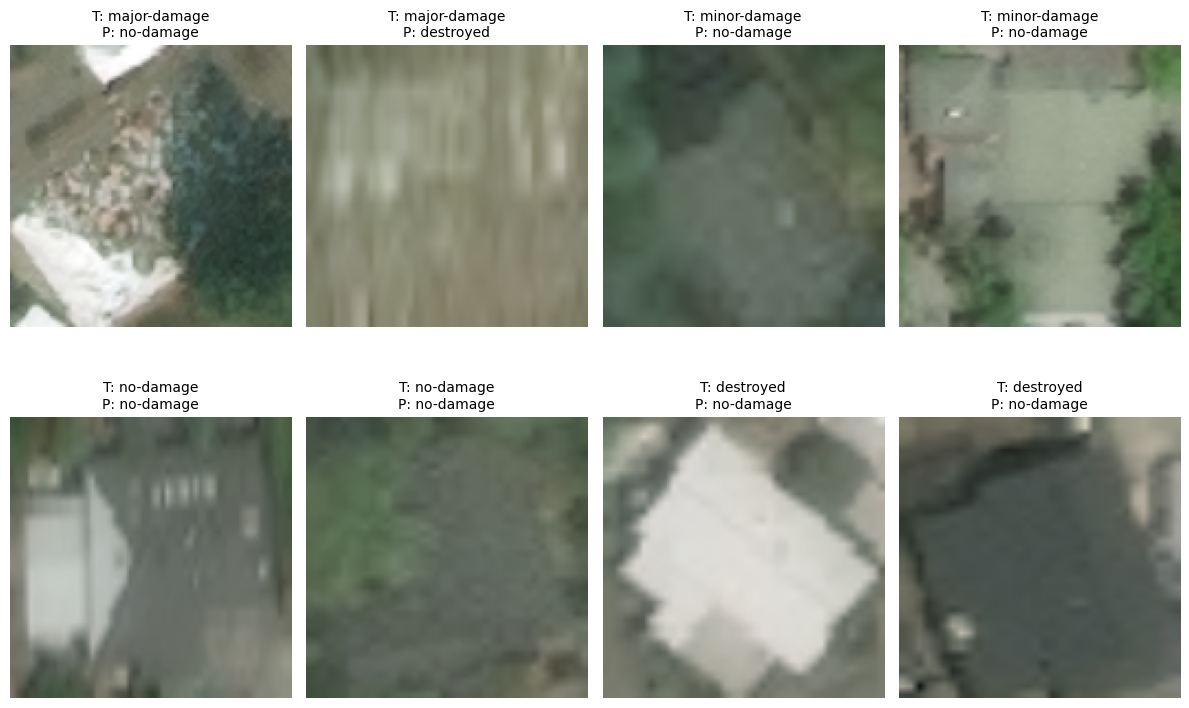

In [ ]:
import matplotlib.pyplot as plt
import random
import torch
from torchvision import transforms
from PIL import Image
import os

# === Same transforms as training ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Class names (taken from train dataset)
class_names = train_data.classes
print("Class mapping:", dict(enumerate(class_names)))

# Function to predict a single image
def predict_image(img_path, model, transform, device):
    image = Image.open(img_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        outputs = model(input_tensor)
        _, pred = torch.max(outputs, 1)
    return class_names[pred.item()]

# === Pick random samples from test set ===
test_root = test_dir  # "/content/xview2_patches/test"
sample_images = []

for class_folder in os.listdir(test_root):
    folder_path = os.path.join(test_root, class_folder)
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        if files:
            # pick 2 random images per class
            sample_images += [os.path.join(folder_path, f) for f in random.sample(files, min(2, len(files)))]

# === Show predictions ===
plt.figure(figsize=(12, 8))
for i, img_path in enumerate(sample_images[:8]):  # show max 8 images
    true_label = os.path.basename(os.path.dirname(img_path))
    pred_label = predict_image(img_path, model, transform, device)

    image = Image.open(img_path)

    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(f"T: {true_label}\nP: {pred_label}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Collect predictions & true labels
all_preds, all_labels = [], []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Overall Accuracy
acc = accuracy_score(all_labels, all_preds)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%\n")

# Detailed classification report
print("📊 Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# Confusion Matrix
print("📌 Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))



✅ Test Accuracy: 78.60%

📊 Classification Report:
              precision    recall  f1-score   support

   destroyed       0.33      0.49      0.39      1005
major-damage       0.04      0.05      0.04        19
minor-damage       0.00      0.00      0.00        24
   no-damage       0.91      0.84      0.87      6392

    accuracy                           0.79      7440
   macro avg       0.32      0.34      0.33      7440
weighted avg       0.82      0.79      0.80      7440

📌 Confusion Matrix:
[[ 490    4    1  510]
 [   2    1    0   16]
 [   2    0    0   22]
 [ 993   21   21 5357]]


In [ ]:
import os

# Dataset base path
data_dir = "/content/xview2_patches"

splits = ["train", "val", "test"]

for split in splits:
    split_path = os.path.join(data_dir, split)
    print(f"\n📂 Split: {split}")

    total = 0
    if os.path.exists(split_path):
        for cls in os.listdir(split_path):
            cls_path = os.path.join(split_path, cls)
            if os.path.isdir(cls_path):
                count = len([f for f in os.listdir(cls_path) if f.endswith((".png", ".jpg", ".jpeg"))])
                print(f"   {cls}: {count}")
                total += count
        print(f"➡️ Total {split}: {total} images")
    else:
        print("   (Split folder not found)")



📂 Split: train
   major-damage: 82
   minor-damage: 109
   destroyed: 4690
   no-damage: 29824
➡️ Total train: 34705 images

📂 Split: val
   major-damage: 17
   minor-damage: 23
   destroyed: 1005
   no-damage: 6390
➡️ Total val: 7435 images

📂 Split: test
   major-damage: 19
   minor-damage: 24
   destroyed: 1005
   no-damage: 6392
➡️ Total test: 7440 images
